In [49]:
#import statements
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from utils.LinearRegressionMetrics import linear_reg_metrics
sns.set_theme(color_codes=True)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
sns.set()
#note that for the figure size to show, this cell should be run
#separately from the import of pyplot
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 4)

In [50]:
# genrate sin wave dataframe
df= pd.DataFrame({'y':np.sin(np.linspace(0,10,100))*10})+100
noise = np.random.normal(0,2,100)
df['with_noise'] = df['y'] + noise
print('y autocorrelation:', df['y'].autocorr(lag=2))
print('with_noise autocorrelation:', df['with_noise'].autocorr(lag=2))
px.scatter(df,y=['y','with_noise'])

y autocorrelation: 0.9765029006816814
with_noise autocorrelation: 0.9142286164421292


In [51]:
df["shifted_1"] = df["y"].shift(1)
df["shifted_noise_1"] = df["with_noise"].shift(1)
px.scatter(x=df['y'][1:],y=df['shifted_1'][1:])

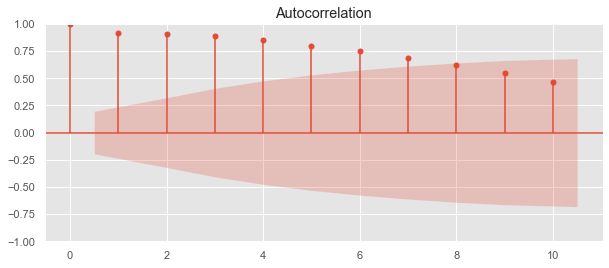

In [52]:
# plot a autocorrelation plot
fig = sm.graphics.tsa.plot_acf(df['with_noise'], lags=10)


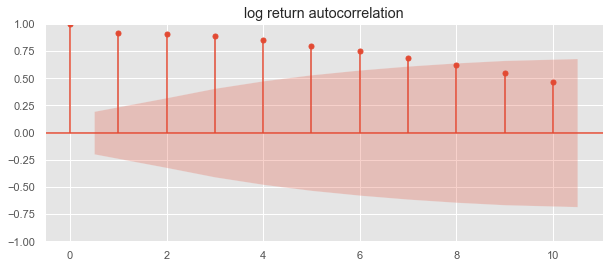

In [53]:
_ = plot_acf(df['with_noise'],lags=10, title='log return autocorrelation')

/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



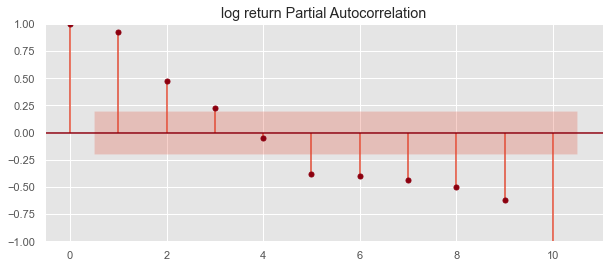

In [54]:
_ = plot_pacf(df['with_noise'], lags=10, title='log return Partial Autocorrelation', color=sns
    .xkcd_rgb["crimson"])

## ARMA model

In [55]:
# fit a ARMA model
AR_lag_p = 13
MA_lag_q = 0
model = ARIMA(df['with_noise'], order=(AR_lag_p,MA_lag_q,MA_lag_q))
arma_fit = model.fit()
print(arma_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             with_noise   No. Observations:                  100
Model:                ARIMA(13, 0, 0)   Log Likelihood                -205.365
Date:                Sun, 24 Apr 2022   AIC                            440.729
Time:                        18:31:16   BIC                            479.807
Sample:                             0   HQIC                           456.544
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.7155      1.309     76.930      0.000      98.150     103.281
ar.L1          0.1233      0.119      1.038      0.299      -0.110       0.356
ar.L2          0.2345      0.136      1.722      0.0

In [56]:
arma_pred = pd.Series(arma_fit.fittedvalues)
arma_pred


0     100.715533
1      99.364150
2     101.167668
3     103.033579
4     103.384375
         ...    
95     98.214197
96     96.761810
97     95.735509
98     96.425184
99     96.469481
Length: 100, dtype: float64

ValueError: x and y must be the same size

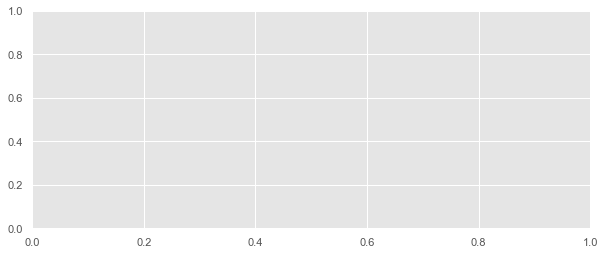

In [57]:
px.scatter(y=[df['with_noise'][:-2],arma_pred[2:]])
plt.scatter(y=[df['with_noise'][:-2],arma_pred[2:]],x=df.index[1:])
print('nthnt')

In [ ]:
linear_reg_metrics(df['with_noise'][:-2],arma_pred[2:],df.index[2:]+2000)
px.line(y=[df['with_noise'][:-2],arma_pred[2:]], title="Linear")